# **Supplementary Activity**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
3. Fill in the area between the bounds in the plot from exercise #2.
4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
4. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
Disappointing user growth announced after close on July 25, 2018
Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
FTC launches investigation on March 20, 2018
Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

quakes = pd.read_csv('earthquakes-1.csv')
quakes

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col= 'date', parse_dates = True)


Using a heatmap, identify wether if there is a correlation between earthquake magnitude and a tsunami with magtype of mb.

<Axes: >

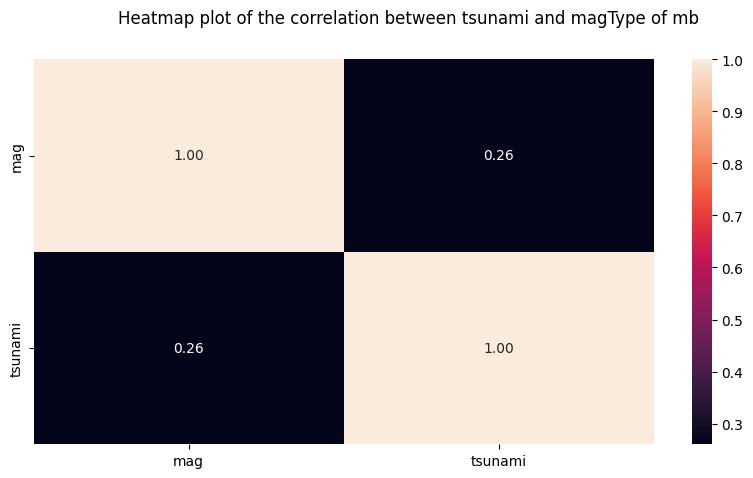

In [30]:

correlation = quakes[['mag', 'tsunami']].corr()

plt.figure(figsize=(10,5))
plt.suptitle('Heatmap plot of the correlation between tsunami and magType of mb')
sns.heatmap(
    correlation,
    annot= True,
    fmt = ".2f",
)



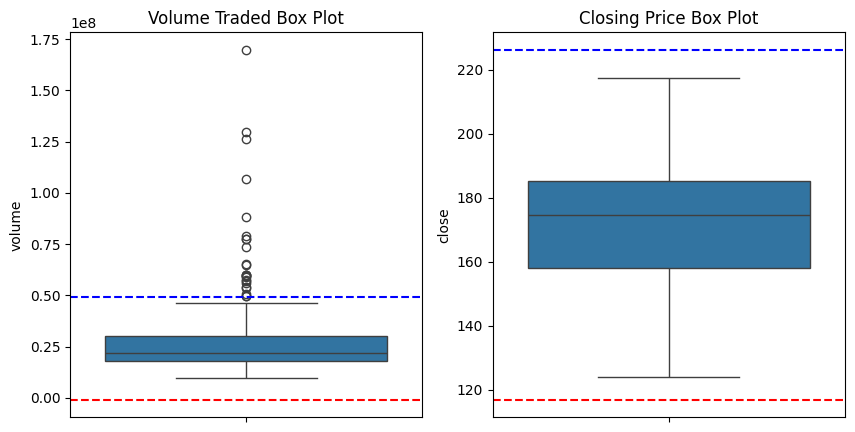

In [3]:

#Creating a boxplot  of facebook volume traded

#Lets set our figures and axes first

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].set_title('Volume Traded Box Plot')
axes[1].set_title('Closing Price Box Plot')

#Calculating for quantiles

#For volume traded
quantile1 = fb.quantile(0.25) #For lower quartile
quantile2 = fb.quantile(0.75) #For upper quartile

iqrV = quantile2 - quantile1 #For interquartile range

lbVol = quantile1 - 1.5 * iqrV
ubVol = quantile2 + 1.5 * iqrV # To find the upper and lower for vol cols

#same procedure for closing
quantile3 = fb.quantile(0.25)
quantile4 = fb.quantile(0.75)

iqrC = quantile4 - quantile3

lbClo = quantile3 - 1.5 * iqrC
ubClo = quantile4 + 1.5 * iqrC

#Plotting Volume and Closing
sns.boxplot(
    y = 'volume',
    data = fb[['volume']],
    ax = axes[0]
)
#Setting lower and upper bounds
axes[0].axhline(y=lbVol['volume'], color = 'red', linestyle = '--', label = 'Lower Bound')
axes[0].axhline(y = ubVol['volume'], color = 'blue', linestyle = '--', label = 'Upper Bound')

# Plotting Closing
sns.boxplot(y='close', 
            data=fb[['close']],
                     ax=axes[1])

# Setting lower and upper bounds for closing
axes[1].axhline(y=lbClo['close'], color='red', linestyle='--', label='Lower Bound')
axes[1].axhline(y=ubClo['close'], color='blue', linestyle='--', label='Upper Bound')



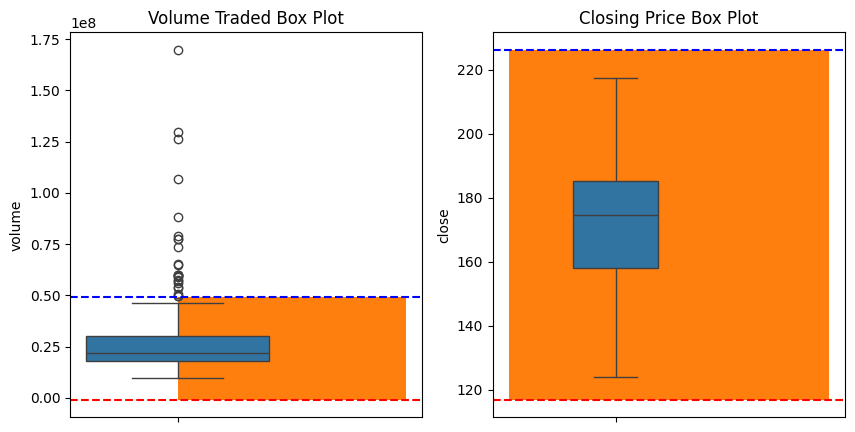

In [29]:
#Fill the area between the lower and upper bounds.


#Lets set our figures and axes first

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].set_title('Volume Traded Box Plot')
axes[1].set_title('Closing Price Box Plot')

#Calculating for quantiles

#For volume traded
quantile1 = fb.quantile(0.25) #For lower quartile
quantile2 = fb.quantile(0.75) #For upper quartile

iqrV = quantile2 - quantile1 #For interquartile range

lbVol = quantile1 - 1.5 * iqrV
ubVol = quantile2 + 1.5 * iqrV # To find the upper and lower for vol cols

#same procedure for closing
quantile3 = fb.quantile(0.25)
quantile4 = fb.quantile(0.75)

iqrC = quantile4 - quantile3

lbClo = quantile3 - 1.5 * iqrC
ubClo = quantile4 + 1.5 * iqrC

#Plotting Volume and Closing
sns.boxplot(
    y = 'volume',
    data = fb[['volume']],
    ax = axes[0]
)
#Setting lower and upper bounds
a = axes[0].axhline(y=lbVol['volume'], color = 'red', linestyle = '--', label = 'Lower Bound')
b = axes[0].axhline(y = ubVol['volume'], color = 'blue', linestyle = '--', label = 'Upper Bound')
axes[0].fill_between([0,1], lbVol['volume'], ubVol['volume'])

# Plotting Closing
sns.boxplot(y ='close', 
            data=fb[['close']],
                     ax=axes[1])

# Setting lower and upper bounds for closing
axes[1].axhline(y=lbClo['close'], color='red', linestyle='--', label='Lower Bound')
axes[1].axhline(y=ubClo['close'], color='blue', linestyle='--', label='Upper Bound')

plt.fill_between([-1, 2], lbClo['close'], ubClo['close'])


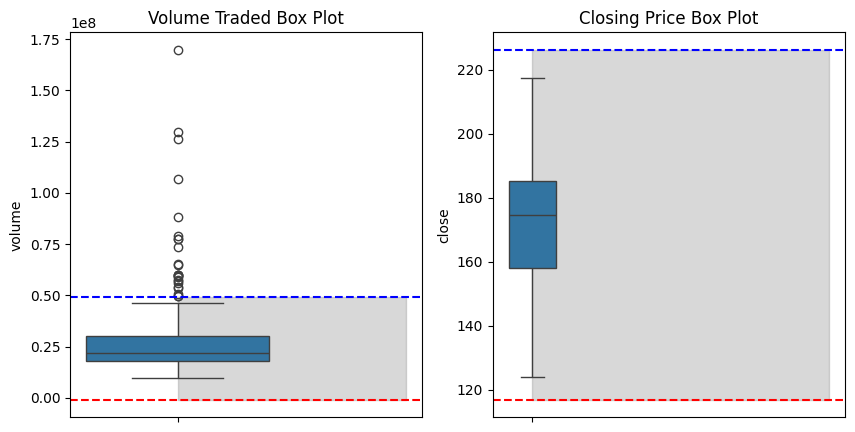

In [27]:
# # For testing

# # Set figure and axes
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].set_title('Volume Traded Box Plot')
# axes[1].set_title('Closing Price Box Plot')

# # Calculating quartiles and interquartile ranges for volume
# quantile1 = fb['volume'].quantile(0.25)
# quantile2 = fb['volume'].quantile(0.75)
# iqrV = quantile2 - quantile1
# lbVol = quantile1 - 1.5 * iqrV
# ubVol = quantile2 + 1.5 * iqrV

# # Calculating quartiles and interquartile ranges for closing price
# quantile3 = fb['close'].quantile(0.25)
# quantile4 = fb['close'].quantile(0.75)
# iqrC = quantile4 - quantile3
# lbClo = quantile3 - 1.5 * iqrC
# ubClo = quantile4 + 1.5 * iqrC

# # Plotting Volume and Closing
# sns.boxplot(y='volume', data=fb[['volume']], ax=axes[0])
# sns.boxplot(y='close', data=fb[['close']], ax=axes[1])

# # Setting lower and upper bounds for volume
# axes[0].axhline(y=lbVol, color='red', linestyle='--', label='Lower Bound')
# axes[0].axhline(y=ubVol, color='blue', linestyle='--', label='Upper Bound')
# axes[0].fill_between(x=[0, 1], y1=lbVol, y2=ubVol, color='gray', alpha=0.3)

# # Setting lower and upper bounds for closing price
# axes[1].axhline(y=lbClo, color='red', linestyle='--', label='Lower Bound')
# axes[1].axhline(y=ubClo, color='blue', linestyle='--', label='Upper Bound')
# axes[1].fill_between(x=[0,1,2,3,4,5], y1=lbClo, y2=ubClo, color='gray', alpha=0.3)


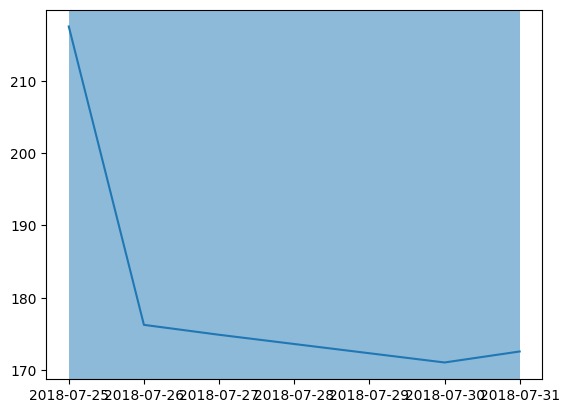

In [48]:
#'2018-07-25' to '2018-07-31'
closingPrice = fb['2018-07-25' : '2018-07-31']['close']
plt.plot(closingPrice)
plt.axvspan('2018-07-25', '2018-07-31', alpha = 0.5)

KeyError: '2018-07-25'

# **Conclusions/Summary**

To Conclude, I was able to perform this supplementary although it might came out late since I still find it hard to cram and study three modules at once.